In [1]:
%matplotlib inline

import matplotlib.pyplot as pyplot
from collections import defaultdict
# import copy

import numpy as np
# from scipy import interpolate

import geopandas as gpd
import shapely.geometry as geom
import shapely.affinity as affine
# import shapely.ops

from weavingspace import Topology
from weavingspace import Symmetry
from weavingspace import TileShape
from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import Symmetries
from weavingspace import tiling_utils

In [2]:
square = tiling_utils.get_regular_polygon(200, 4)
L_shape = square.union(
  affine.translate(square, 200, 0)).union(
  affine.translate(square, 0, 200))
# L_shape = tiling_utils.get_clean_polygon(L_shape)

tile = TileUnit()
tile.base_shape = TileShape.HEXAGON
tile.tiles = gpd.GeoDataFrame(
  {"tile_id": list("abcd")},
  geometry = gpd.GeoSeries([affine.translate(L_shape, -100, 200), 
                            affine.translate(L_shape, 100, -200),
                            affine.translate(L_shape, -100, -400), 
                            affine.translate(L_shape, -300, 0)]))
tile.setup_regularised_prototile_from_tiles()
tile.prototile = gpd.GeoDataFrame(
  geometry = gpd.GeoSeries(
    geom.Polygon([(100, -450), (-300, -350), (-300, 350),
                  (-100, 450), (300, 350), (300, -350)])))
tile.vectors = tile.get_vectors()
# tile = tile.transform_rotate(90)

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


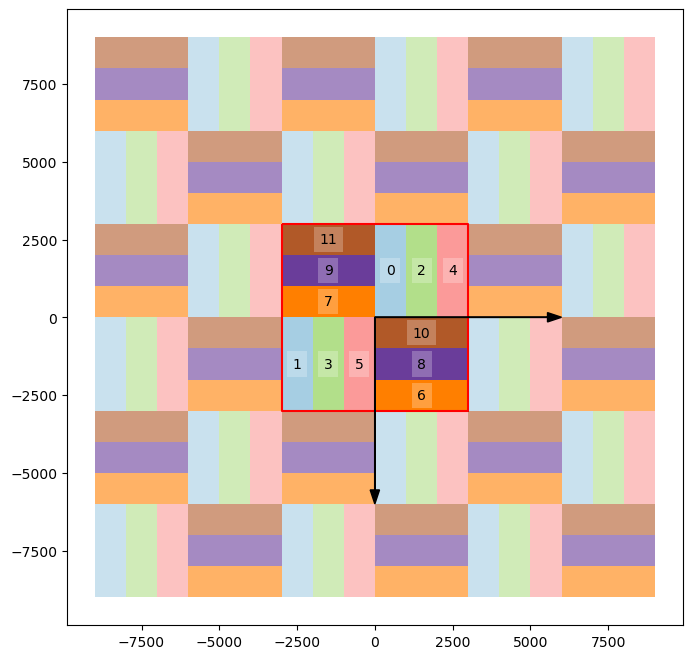

In [84]:
tile = TileUnit(tiling_type = "archimedean", code = "3.3.4.3.4")
tile = TileUnit(tiling_type = "hex-dissection", n = 9, offset = 1)
# tile = TileUnit(tiling_type = "hex-slice", n = 3, offset = 1)
# tile = TileUnit(tiling_type = "archimedean", code = "3.4.6.4")
# tile = TileUnit(tiling_type = "archimedean", code = "3.12.12")
# tile = TileUnit(tiling_type = "archimedean", code = "4.8.8")
# tile = TileUnit(tiling_type = "cairo", n = 3)
# tile = TileUnit(tiling_type = "hex-colouring", n = 3).transform_skew(20).transform_scale(1.2)
# tile = WeaveUnit(weave_type = "plain", n = 2, strands = "a|d")
tile = WeaveUnit(weave_type = "basket", n = 3, strands = "abc|def")
# tile = WeaveUnit(weave_type = "twill", n = 2, strands = "ab|de")
ax = tile.plot(r = 1, show_reg_prototile = True, show_prototile = True, cmap = "Paired", show_ids = "id", r_alpha = 0.6, show_vectors = True)

In [85]:
topo = Topology(tile)

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


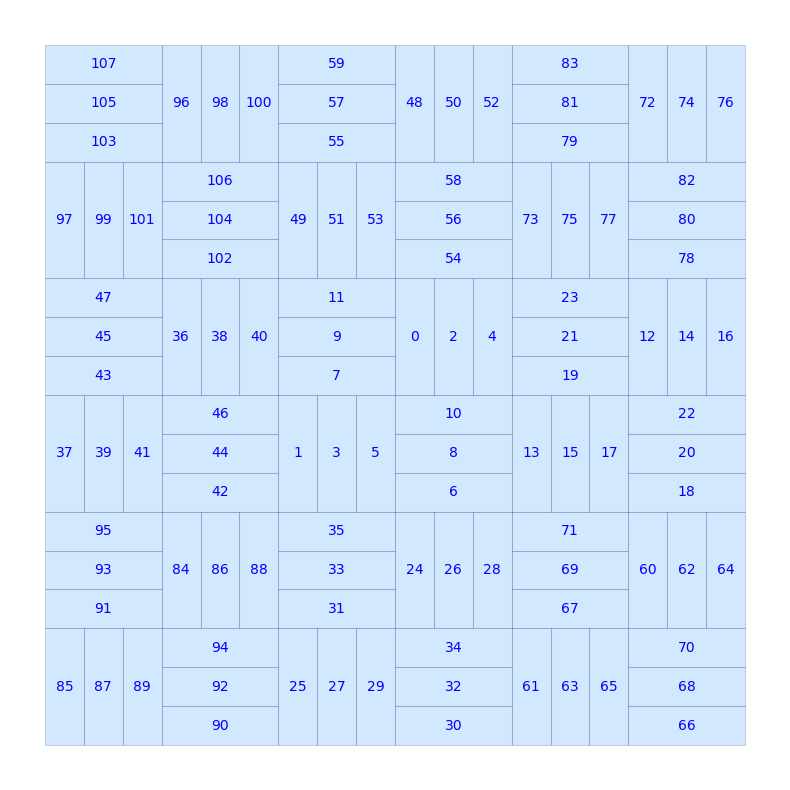

In [86]:
ax = topo.plot(
  show_original_tiles = True,
  show_tile_vertex_labels = False,
  show_tile_centres = True,
  show_vertex_labels = False,
  show_vertex_ids = False,
  show_edge_labels = False,
  show_edges = False,
  offset_edges = False,
  show_dual_tiles = False
)
# gpd.GeoSeries(symmetry_centres).plot(ax = ax)

In [87]:
topo.tile_equivalence_classes

[(2, 3, 8, 9), (0, 1, 4, 5, 6, 7, 10, 11)]

(-9900.0, 9900.0, -9900.0, 9900.0)

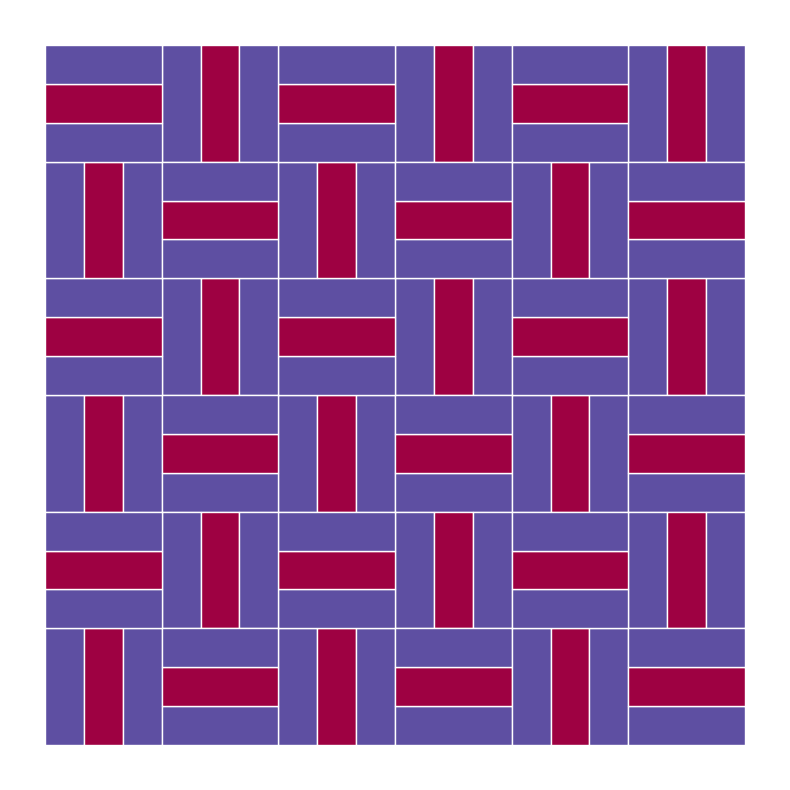

In [88]:
gdf = gpd.GeoDataFrame(
  data = {"equivalence_class": [t.equivalence_class for t in topo.tiles]},
  geometry = gpd.GeoSeries([t.shape for t in topo.tiles])
)
gdf.plot(column = "equivalence_class", figsize = (10, 10), ec = "w", cmap = "Spectral")
pyplot.axis("off")

<Axes: >

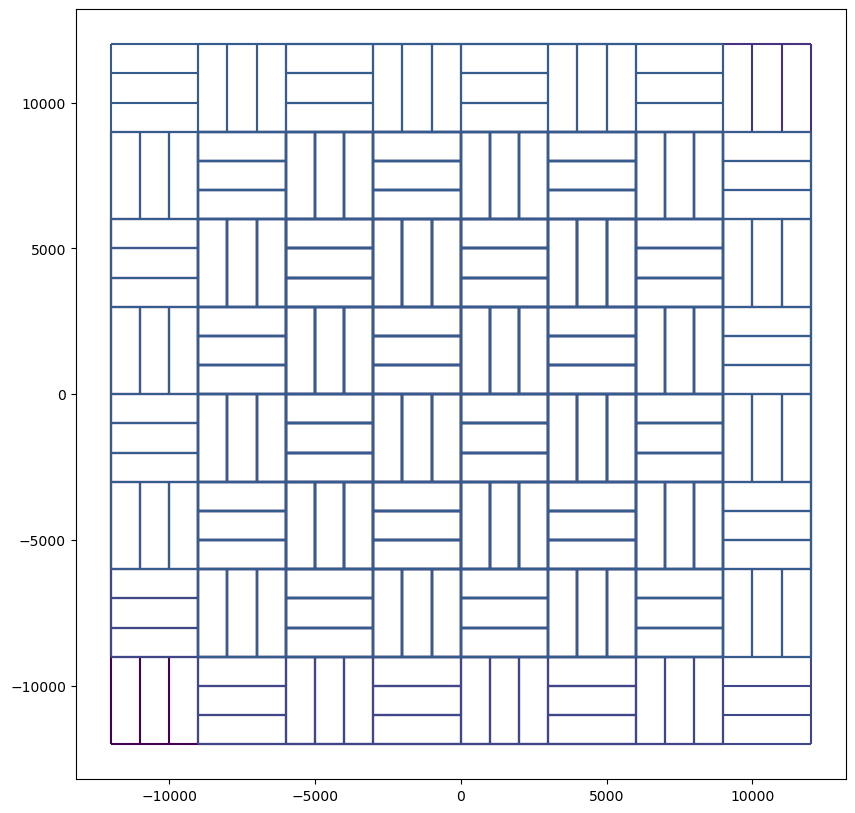

In [96]:
transforms = topo.tile_matching_transforms
pts = [v.get_geometry() for v in topo.edges.values()]
t_pts = []
t_ids = []
for i, t in enumerate(transforms.values()):
  t_pts.extend([affine.affine_transform(p, t) for p in pts])
  t_ids.extend([i] * len(t_pts))
ax = gpd.GeoSeries(pts).plot(figsize = (10, 10), markersize = 2)
gdf = gpd.GeoDataFrame(
  data = {"transform": t_ids},
  geometry = gpd.GeoSeries(t_pts)
)
gdf.plot(column = "transform", ax = ax)